# Introduction
This notebook is created to facilitate EDA and to create a machine learning model to predict Multi-Class obesity risk

In [1]:
import os
new_directory = 'C:/Users/sm94c/Documents/Data Science Projects/Multi Class Obesity Prediction'
os.chdir(new_directory)

In [2]:
import pandas as pd

df = pd.read_csv("train.csv")

In [3]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.info()
#no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [5]:
def summary(df):
    print(f'data shape: {df.shape}')  
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values 
    summ['%missing'] = df.isnull().sum().values / len(df)* 100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    return summ

summary(df)

data shape: (20758, 18)


,data type,#missing,%missing,#unique,min,max
id,int64,0,0.0,20758,0.0,20757.0
Gender,object,0,0.0,2,NaN,NaN
Age,float64,0,0.0,1703,14.0,61.0
Height,float64,0,0.0,1833,1.45,1.975663
Weight,float64,0,0.0,1979,39.0,165.057269
family_history_with_overweight,object,0,0.0,2,NaN,NaN
FAVC,object,0,0.0,2,NaN,NaN
FCVC,float64,0,0.0,934,1.0,3.0
NCP,float64,0,0.0,689,1.0,4.0
CAEC,object,0,0.0,4,NaN,NaN


In [6]:
df.size

373644

In [7]:
df.shape
#18 columns, 20K entries.

(20758, 18)

# EDA

Let's explore the relationship between different variables within the dataset. 

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
plt.style.use('ggplot')

<Axes: xlabel='Age', ylabel='Weight'>

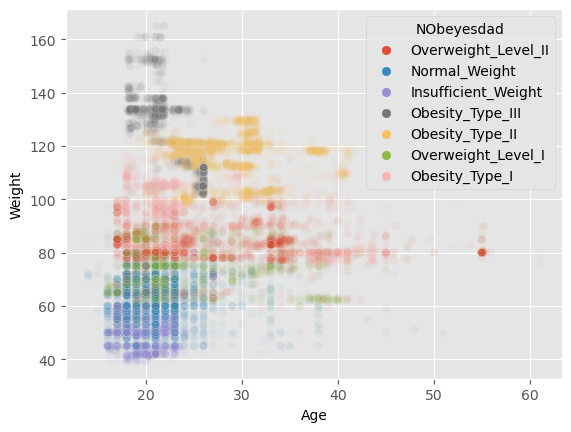

In [10]:
sns.scatterplot(df, x='Age',y='Weight',hue='NObeyesdad',alpha=0.05)

- most people in the dataset have obesity type 3
- Observed a higher class of people from ages 25-35 have type 2 obesity
- Most people of class Insufficient weight are between ages 15 and 25

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Overweight_Level_II'),
  Text(1, 0, 'Normal_Weight'),
  Text(2, 0, 'Insufficient_Weight'),
  Text(3, 0, 'Obesity_Type_III'),
  Text(4, 0, 'Obesity_Type_II'),
  Text(5, 0, 'Overweight_Level_I'),
  Text(6, 0, 'Obesity_Type_I')])

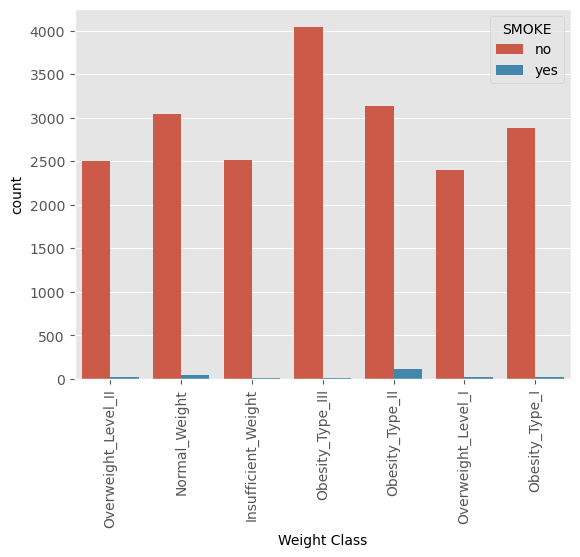

In [11]:
sns.countplot(df, x='NObeyesdad', hue='SMOKE')
plt.xlabel("Weight Class")
plt.xticks(rotation=90)

- People with Obesity type 2 have the highest distribution of smokers

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Overweight_Level_II'),
  Text(1, 0, 'Normal_Weight'),
  Text(2, 0, 'Insufficient_Weight'),
  Text(3, 0, 'Obesity_Type_III'),
  Text(4, 0, 'Obesity_Type_II'),
  Text(5, 0, 'Overweight_Level_I'),
  Text(6, 0, 'Obesity_Type_I')])

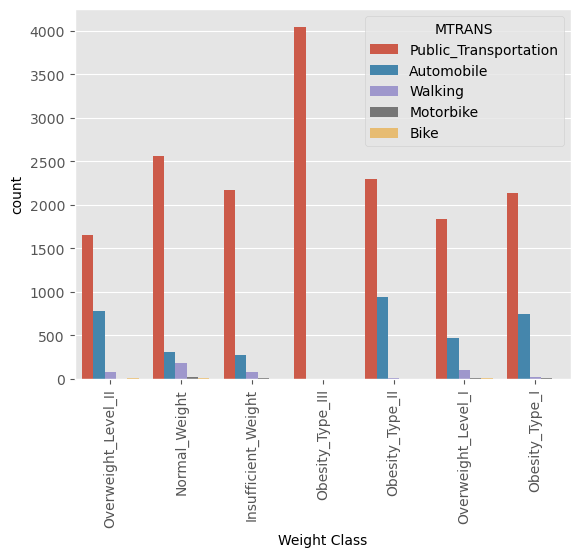

In [12]:
sns.countplot(df,x='NObeyesdad',hue='MTRANS')
plt.xlabel("Weight Class")
plt.xticks(rotation=90)

- Entries of obesity type 2 generally use more automobiles than other classes
- Normal Weight entries walk more than other classes

<Axes: xlabel='Height', ylabel='Weight'>

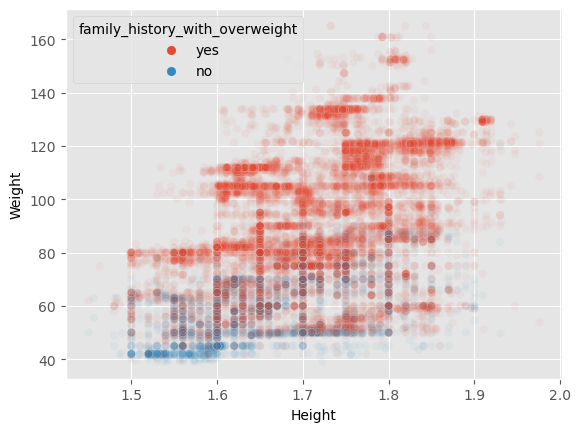

In [13]:
sns.scatterplot(df,x='Height',y='Weight',alpha=0.05, hue='family_history_with_overweight')

## Feature Engineering

Let's create some new features to act as predictors for obesity. We noticed before that there are some groups that acted as good predictors for certain classes of obesity. Let's engineer them.

In [14]:
df_eng = df.copy()
df_eng['IsYoung'] = df_eng['Age'].apply(lambda x: x < 25)
df_eng['IsAging'] = df_eng['Age'].apply(lambda x: 25 <= x < 40)
df_eng['BMI'] = df_eng['Weight'] / (df_eng['Height'] / 100) ** 2

In [15]:
df_eng

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,...,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,IsYoung,IsAging,BMI
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,...,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,True,False,282595.647630
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,...,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,True,False,234220.907298
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,...,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,True,False,171267.057985
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,...,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,True,False,448557.984029
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,...,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,False,True,255991.509829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,...,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II,False,True,365870.835839
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,...,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight,True,False,170992.784105
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,...,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II,True,False,318898.405227
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,...,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II,False,True,288996.930796


# Machine Learning Model

In [23]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier


X = df_eng.drop('NObeyesdad',axis=1)
y = df['NObeyesdad']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder

In [26]:
# Label encode the target variable y
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

In [27]:
categorical_cols = X.select_dtypes(include=['object','bool']).drop('CALC',axis=1).columns
numerical_cols = X.select_dtypes(exclude=['object','bool']).columns

# Preprocessing for numerical data
numerical_transformer = StandardScaler()
# Preprocessing for categorical data
categorical_transformer = OrdinalEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

params = {
    'n_estimators': 1312,
    'learning_rate': 0.018279520260162645,
    'gamma': 0.0024196354156454324,
    'reg_alpha': 0.9025931173755949,
    'reg_lambda': 0.06835667255875388,
    'max_depth': 5,
    'min_child_weight': 5,
    'subsample': 0.883274050086088,
    'colsample_bytree': 0.6579828557036317
}

xgb = XGBClassifier(random_state=42, **params)

# Update the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb)])

# Fit the transformers on the training data
pipeline.fit(X_train, y_train_encoded)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'BMI'],
      dtype='object')),
                                                 ('cat', OrdinalEncoder(),
                                                  Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'MTRANS', 'IsYoung', 'IsAging'],
      dtype='object'))])),
                ('classifier',
                 XGBCl...
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.018279520260162645, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=5,
                               max_leaves=None, min_child_weight=5, missing=nan,
                               monotone_constraints=None, n_estimators=1312,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [28]:
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(pipeline, X_train, y_train_encoded, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)

# Print the mean accuracy and standard deviation
print("Mean Accuracy: {:.2f}%".format(cross_val_scores.mean() * 100))
print("Standard Deviation: {:.2f}".format(cross_val_scores.std()))

Cross-validation scores: [0.89674895 0.90755796 0.89852454 0.90364348 0.91869919]
Mean Accuracy: 90.50%
Standard Deviation: 0.01


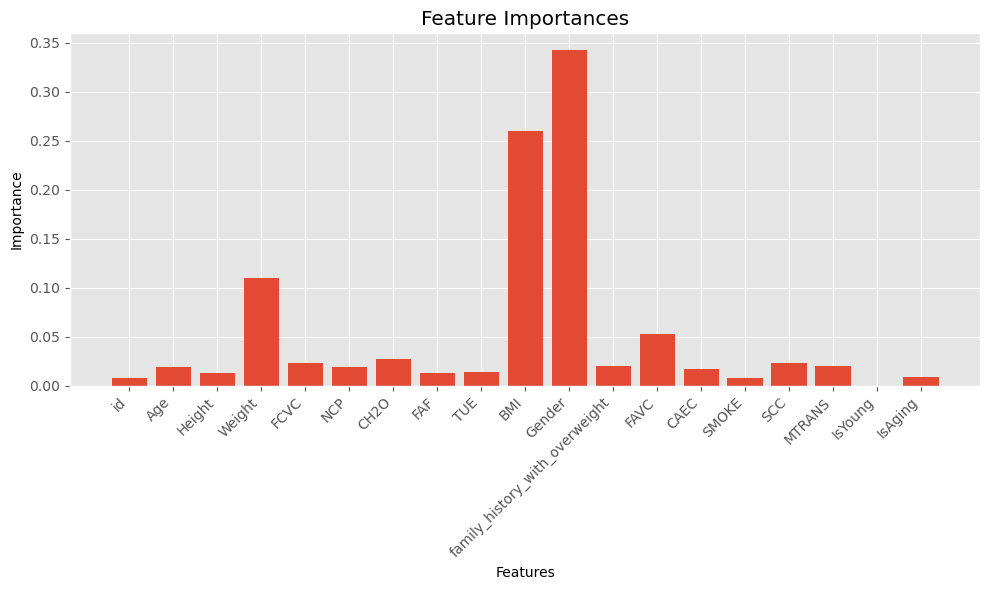

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from xgboost import plot_importance

# Assuming 'pipeline' is your scikit-learn pipeline with XGBClassifier
xgb_classifier = pipeline.named_steps['classifier']
preprocessor = pipeline.named_steps['preprocessor']

# Get the original feature names after encoding
categorical_cols = X.select_dtypes(include=['object', 'bool']).drop('CALC', axis=1).columns
numerical_cols = X.select_dtypes(exclude=['object', 'bool']).columns
all_feature_names = numerical_cols.tolist() + categorical_cols.tolist()
encoded_feature_names = preprocessor.transformers_[1][1].get_feature_names_out(categorical_cols)
final_feature_names = np.concatenate([numerical_cols, encoded_feature_names])

# Get feature importances from the XGBoost model
importances = xgb_classifier.feature_importances_

# Create a bar plot with feature importances and correct feature names
plt.figure(figsize=(10, 6))
plt.bar(final_feature_names, importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



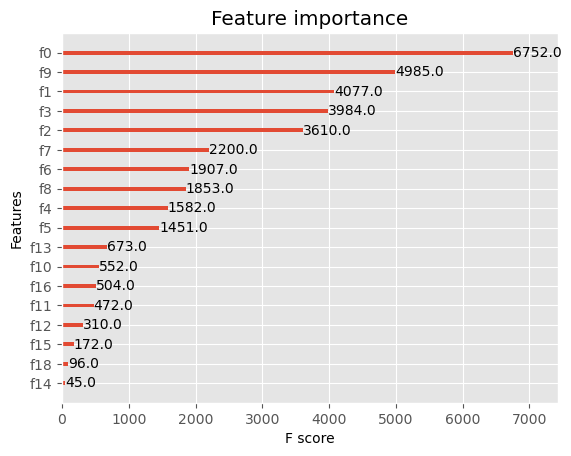

In [23]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Assuming 'pipeline' is your scikit-learn pipeline with XGBClassifier
xgb_classifier = pipeline.named_steps['classifier']

# Plot feature importances
plot_importance(xgb_classifier)
plt.show()


# Time to Make Predictions

In [29]:
df_test = pd.read_csv("test.csv")


In [30]:
df_test_eng = df_test.copy()
df_test_eng['IsYoung'] = df_test_eng['Age'].apply(lambda x: x < 25)
df_test_eng['IsAging'] = df_test_eng['Age'].apply(lambda x: 25 <= x < 40)
df_test_eng['BMI'] = df_test_eng['Weight'] / (df_test_eng['Height'] / 100) ** 2


In [31]:
df_test_eng['CALC'].unique()
# calc has a unique entry in it, so it will be dropped. 

array(['Sometimes', 'no', 'Frequently', 'Always'], dtype=object)

categorical_cols2 = df_test_eng.select_dtypes(include=['object', 'bool']).columns
numerical_cols2 = df_test_eng.select_dtypes(exclude=['object', 'bool']).columns

# Apply transformations manually
numerical_transformed = StandardScaler().fit_transform(df_test_eng[numerical_cols2])
categorical_transformed = OrdinalEncoder().fit_transform(df_test_eng[categorical_cols2])

# Create a DataFrame with the transformed data
transformed_df = pd.DataFrame(
    data=pd.concat([pd.DataFrame(numerical_transformed, columns=numerical_cols2),
                   pd.DataFrame(categorical_transformed, columns=categorical_cols2)], axis=1)
)
transformed_df

In [32]:
df_test_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                            13840 non-null  float64
 12  SCC                             

In [33]:
predictions = pipeline.predict(df_test_eng.drop('CALC',axis=1))

In [34]:
# Assuming 'label_encoder' is your LabelEncoder and 'predictions' is the encoded predictions
predicted_original_values = label_encoder.inverse_transform(predictions)
predicted_original_values

array(['Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_III', ...,
       'Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_II'],
      dtype=object)

In [35]:
# Create a DataFrame with 'ID' and 'Prediction'
result_df = pd.DataFrame({
    'id': df_test_eng['id'],  # Replace 'ID' with the actual column name
    'Prediction': predicted_original_values})


In [36]:
result_df

,id,Prediction
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Normal_Weight
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [37]:
result_df.to_csv("Submission_3.csv",index=False)